# Instalación de librerías necesarias:

Para realizar la manipulación de las imágenes en el lenguaje Python, es necesario realizar la importación de librerías que nos permitan acceder a la información de una manera más sencilla. Por lo tanto, se utilizarán las librerías numpy y pandas para el manejo de datos numéricos y bases de datos; spectral, para el manejo y manipulación de información espectral; matplotlib para la creación y visualización de imágenes; finalmente la librería os para la lectura de datos dentro de carpetas. La importación de librerías generalmente se realiza mediante alias que ayudarán con la codificación de forma organizada y resumida.
Si alguna de las librerías no ha sido instalada, se deberá utilizar el comando: !pip install 

In [11]:
!pip install SpectralPy

In [12]:
!pip install spectral

# Importación de librerías necesarias para el procesamiento

In [1]:
from spectral import imshow, view_cube
import spectral.io.envi as envi
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
import pandas as pd 
import numpy.ma as ma
import os 

# Lectura de las rutas donde se encuentran las imágenes

In [2]:
base_dir = 'C:/Users/Drone2018/Desktop/SWIR' 

In [8]:
swirs = os.listdir(f'{base_dir}')
swirs = [i for i in swirs if i[-4:]=='.hdr' and 'satmask' not in i ]
print(swirs)

['S21-0001_SWIR_384_SN12004_10616us_2021-06-03T115117_raw_rad_ref_float32.hdr', 'S21-0002_SWIR_384_SN12004_10616us_2021-06-03T120458_raw_rad_ref_float32.hdr', 'S21-0003_SWIR_384_SN12004_10616us_2021-06-03T121600_raw_rad_ref_float32.hdr', 'S21-0004_SWIR_384_SN12004_10616us_2021-06-03T122758_raw_rad_ref_float32.hdr', 'S21-0005_SWIR_384_SN12004_10616us_2021-06-03T123832_raw_rad_ref_float32.hdr']


## Depuración de códigos

In [4]:
cods = {}
for direccion in swir:
    separador = direccion.find("_") 
    codigo = direccion[0:separador]
    codigo = codigo.replace("-","")
    codigo = codigo.replace("_","")
    if codigo not in cods:
        cods[codigo] = direccion
print(cods.keys())

dict_keys(['S210001', 'S210002', 'S210003', 'S210004', 'S210005'])


# Apertura de imágenes SWIR:

El tiempo que conlleva la apertura de imágenes dependerá de la cantidad y el peso individual de cada archivo. Las imágenes SWIR al tener menor resolución que las VNIR se pueden leer en grupos más grandes (aproximadamente 100).

In [9]:
img_swirs = [np.array((envi.open(f"{base_dir}/{swir}", f"{base_dir}/{swir[:-4]}.img")).load()) for swir in swirs]

In [10]:
img_swirs[0].shape


(1216, 384, 288)

## Plot de una imagen individual:
Al tener almacenadas las imágenes en forma de matriz, se puede acceder a cada una por medio de los [] y el indicativo de cada una [0,1,2,3... etc]. Siendo 0 el primer valor, es decir la imagen # 1.

### Plot Banda individual:
Teniendo en cuenta que cada imagen está compuesta de 3 dimensiones (X, Y, Z), se debe acceder a ella especificando el número de banda y el lugar: plot_image[:   , :  ,   banda n]. 

(1216, 384, 288)


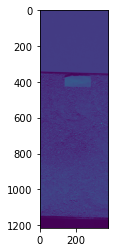

In [11]:
imagen1 = img_swirs[0] #imagen 1
fig, ax = plt.subplots(1) # creación de ejes
img_plot =ax.imshow(imagen1[:,:,200]) # banda 200
print(imagen1.shape)

plt.savefig('imagen_completa.jpeg', dpi = 1200)

# Plot ROI

(1216, 384, 288)


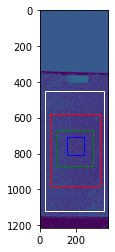

In [8]:
imagen1 = img_swirs[0] #imagen 1
fig, ax = plt.subplots(1) # creación de ejes
ax.imshow(imagen1[:,:,200])#Banda 200
print(imagen1.shape)

# ROI_100 = patches.Rectangle((25, 1100), 935, 1870, linewidth=1, edgecolor='w', facecolor="none")          #Coordenadas 100 en X y 600 en Y, con un tamaño de 200x200 pix
# ROI_50 = patches.Rectangle((90, 1400), 844,1080 , linewidth=1, edgecolor='r', facecolor="none")
# ROI_17 = patches.Rectangle((300, 1700), 500, 500, linewidth=1, edgecolor='g', facecolor="none")
# ROI_4 = patches.Rectangle((360, 1825), 267, 267, linewidth=1, edgecolor='b', facecolor="none")


ROI_100 = patches.Rectangle((30, 450),330, 670, linewidth=1, edgecolor='w', facecolor="none")          #Coordenadas 100 en X y 600 en Y, con un tamaño de 200x200 pix
ROI_50 = patches.Rectangle((55, 580),280,400 , linewidth=1, edgecolor='r', facecolor="none")
ROI_17 = patches.Rectangle((96, 670),200, 200, linewidth=1, edgecolor='g', facecolor="none")
ROI_4 = patches.Rectangle((150, 710),100, 100, linewidth=1, edgecolor='b', facecolor="none")

ax.add_patch(ROI_100)
ax.add_patch(ROI_50)
ax.add_patch(ROI_17)
ax.add_patch(ROI_4)

# plt.savefig('roi_4.jpeg', dpi = 1200)

# Importar el archivo .csv con las bandas:
Se debe rectificar que las bandas coincidan con el archivo .txt donde se muestran todas las bandas pertenecientes a cada cámara (SWIR = 288 bandas; VNIR = 88 bandas). En este caso se tomó desde el elemento número 2 hasta el último (bands_swir[1:])

In [12]:
bands_swir = np.genfromtxt('C:/Users/Drone2018/Desktop/BANDAS/SWIR.csv', delimiter=',')
len(bands_swir)


288

# Función para extraer la región de interés (ROI)

In [13]:
def extract_roi(arr, x, y, w, h):
    roi = arr[y:y+h, x:x+w, :]
    return roi

# Definición del ROI

In [14]:
coordenadas = [(30, 450)]
rois = [] 
largo = 670 
ancho = 330
imagenes = img_swirs

# Extracción del ROI

In [15]:
for coordenada in coordenadas:
    (x, y) = coordenada
    rois = [extract_roi(imagen, x, y, ancho, largo) for imagen in imagenes]
    print(rois[0].shape)

(670, 330, 288)


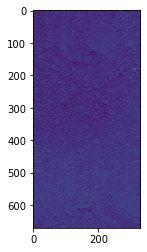

In [16]:
roi_plot = rois[0]
fig, ax = plt.subplots(1) 
ax.imshow(roi_plot[:,:,200])
# plt.savefig('roi_100_cut.jpeg', dpi = 1200)

In [17]:
rois[0].shape

(670, 330, 288)

# Función calcule_reflectance()

In [18]:
def calcule_reflectance(rois, bands, masking):
    roi_intensities = []
    for i in range(len(rois)):
        roi = rois[i]
        intensities = []
        for b in range(roi.shape[2]):
            roi_masked = ma.masked_less_equal(roi[:, :,b],masking)
            intensities.append(roi_masked.mean())
        plt.plot(bands, intensities, label='{}'.format(list(cods.keys())[i]))
        roi_intensities.append(intensities)
        plt.legend(loc='upper left')
        plt.title('Soil spectral footprint\n Mean in ROI Area')
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('Reflectance')
        plt.show()
    return roi_intensities


# Exportación de archivo .csv con los espectros promedio

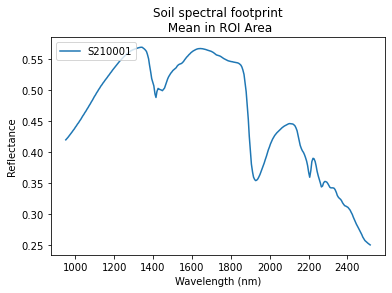

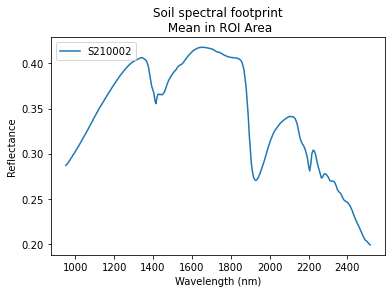

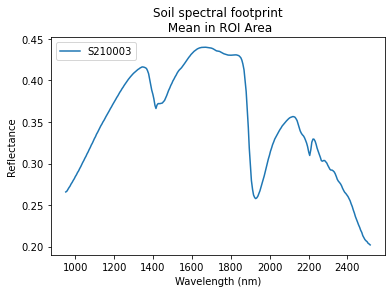

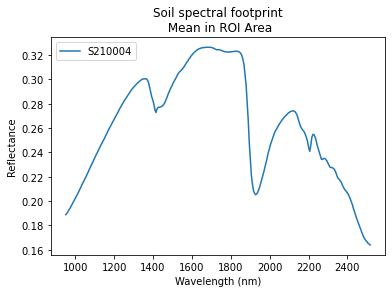

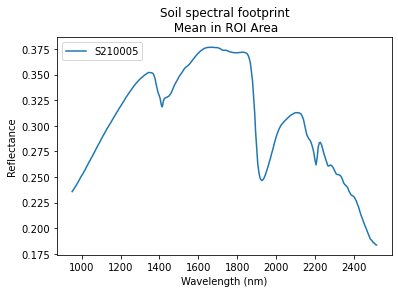

In [19]:
swir_data = pd.DataFrame(np.array(calcule_reflectance(rois, bands_swir,0)), columns=bands_swir, index= list(cods.keys()))
swir_data.to_csv('C:/Users/Drone2018/Desktop/SWIR_CSV_REF/ensayo.csv')